## K-Means Algorithm - Iris

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(2)
iris_pca = pca.fit_transform(iris_std)

#### 1. 군집화(Clustering)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(iris_std)        # 비지도 학습이므로 y값을 제공하지 않음

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [10]:
# 학습 결과
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

In [11]:
# numbering은 임의로 부여
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([49, 55, 46], dtype=int64))

#### 2. 시각화

In [12]:
df = pd.DataFrame(iris_pca, columns=['PC1','PC2'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,0
50,1.101781,0.862972,1,1
51,0.731337,0.594615,1,1
52,1.240979,0.616298,1,1
53,0.407483,-1.754404,1,2


In [13]:
# 데이터 분포
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      0         49
       2          1
1      1         13
       2         37
2      1         42
       2          8

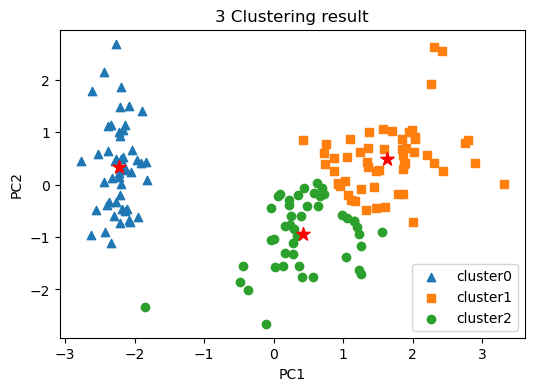

In [14]:
markers = ['^','s','o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title('3 Clustering result')
plt.show()

#### 3. Original Data vs. Clustering result

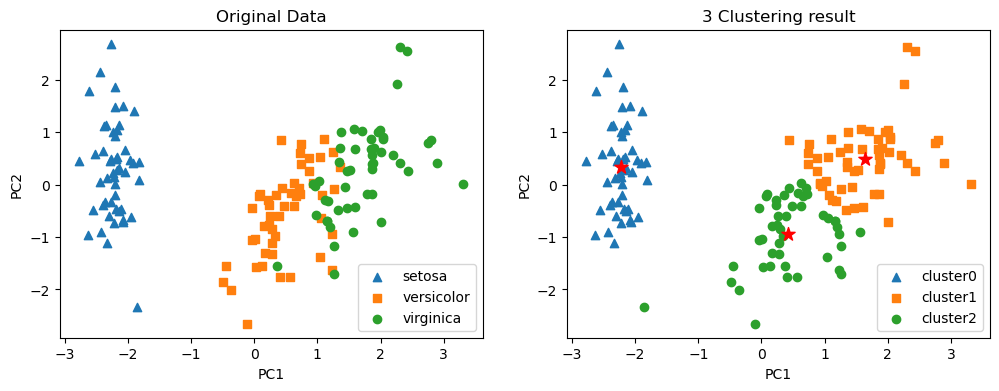

In [16]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if column == 'target':
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    title = 'Original Data' if column=='target' else '3 Clustering result'
    plt.title(title)
plt.show()